# Exercício 2

Nesse exercício você usará a tabela dos jogos do campeonato brasileiro de 2018 (brasileiro2018.csv) e a tabela com a classificação final do campeonato brasileiro do mesmo ano (classificacao2018.csv).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('brasileiro2018.csv')
df.columns = ['casa', 'gols_c', 'gols_v', 'visitante', 'pp', 'iv', 'iv%', 'renda_L', 'renda_B']
df.head()

# casa = time dono do mando de campo
# gols_c = gols do time da casa
# visitante = time visitante
# gols_v = gols do time visitante
# pp = público presente
# iv = ingressos vendidos
# iv% = porcentagem de ingressos vendidos
# renda_L = renda líquida do jogo
# renda_B = renda bruta do jogo

#print('size:', df.shape)

,casa,gols_c,gols_v,visitante,pp,iv,iv%,renda_L,renda_B
0,São Paulo-SP,1,0,Paraná-PR,11.327,15.437,73,"R$ 140.284,04","R$ 338.295,00"
1,Botafogo-RJ,1,1,Palmeiras-SP,7.020,7.515,93,"R$ -200.131,47","R$ 207.880,00"
2,Athletico Paranaense-PR,5,1,Chapecoense-SC,8.395,8.395,100,"R$ -77.837,78","R$ 130.015,00"
3,Internacional-RS,2,0,Bahia-BA,18.460,18.460,100,"R$ 524.782,95","R$ 796.275,00"
4,Corinthians-SP,2,1,Fluminense-RJ,28.777,28.777,100,"R$ 871.251,02","R$ 1.372.018,06"


In [3]:
df2 = pd.read_csv('classificacao2018.csv')
df2.columns = ['time', 'P', 'J', 'V', 'E', 'D', 'GP', 'GC', 'SG']
df2 = pd.concat([df2, pd.DataFrame({'classificação': np.arange(1, len(df2)+1)})], axis = 1)
df2.head()

# P = pontos
# J = jogos
# V = vitórias
# E = empates
# D = derrotas
# GP = gols pró
# GC = gols contra
# SG = saldo de gols

#print('size:', df2.shape)

,time,P,J,V,E,D,GP,GC,SG,classificação
0,Palmeiras,80,38,23,11,4,64,26,38,1
1,Flamengo,72,38,21,9,8,59,29,30,2
2,Internacional,69,38,19,12,7,51,29,22,3
3,Grêmio,66,38,18,12,8,48,27,21,4
4,São Paulo,63,38,16,15,7,46,34,12,5


### Problema

Dados dois times e o mandante da partida, é possível criar um classificador que preveja o time vencedor?


#### Questão 1

Compare o resultado dos classificadores vistos em aula com o classificador *dummy*.

Faça uma análise da acurácia, precisão e recall por meio de tabelas e plots.

Utilizando os métodos de busca vistos em aula, tente maximizar a acurácia na previsão dos jogos onde o time visitante vence a partida.

Utilizando dados de tendências, isto é, se um time vem de vitórias (ou derrotas) nas últimas partidas, é possível melhorar as previsões?

Existe alguma outra informação que possa ser relevante para melhorar as previsões?

Por fim, usando apenas os 300 primeiros jogos para treino, é possível, baseado nas previsões feitas, estimar o ranking final dos times? 
Qual é o erro da estimativa feita e da classifição final?
O erro é dado pelo somatório do quadrado das diferenças entre a classificação estimada e a real.

#### Questão 2

Um empresário está em busca de um time do campeonato brasileiro para fechar uma parceria.

A parceria consiste no fornecimento de transporte e hospedagem para todos os jogos onde o time é visitante, e em contra partida o time se propõe a utilizar a logo da empresa nesses jogos e dividir a renda líquida dos jogos em 80% para o clube e 20% para a empresa.

Baseado nos dados do primeiro turno do campeonato de 2018 (isto é, os 190 primeiros jogos), faça uma lista de recomendação com as três melhores opções de time para patrocinar.

Suponha que a empresa consiga faturar em média 2 reais por torcedor presente.

Escolhendo a melhor opção de time para investir, faça uma análise se a opção escolhida continuou a ser boa nos 190 jogos restantes.

### Questão 1

#### 1. Construção da base de treino

##### 1.1 Correção dos nomes

In [4]:
df['casa'].unique()

array(['São Paulo-SP', 'Botafogo-RJ', 'Athletico Paranaense-PR',
       'Internacional-RS', 'Corinthians-SP', 'Vasco-RJ',
       'América Mineiro-MG', 'Santos-SP', 'Vitória-BA', 'Cruzeiro-MG',
       'Sport-PE', 'Grêmio-RS', 'Palmeiras-SP', 'Ceará-CE',
       'Fluminense-RJ', 'Chapecoense-SC', 'Atlético Mineiro-MG',
       'Paraná-PR', 'Flamengo-RJ', 'Bahia-BA'], dtype=object)

In [5]:
df2['time'].unique()

array(['Palmeiras ', 'Flamengo ', 'Internacional ', 'Grêmio ',
       'São Paulo ', 'Atlético-MG ', 'Athletico ', 'Cruzeiro ',
       'Botafogo ', 'Santos ', 'Bahia ', 'Fluminense ', 'Corinthians ',
       'Chapecoense ', 'Ceará ', 'Vasco ', 'Sport ', 'América-MG ',
       'Vitória ', 'Paraná '], dtype=object)

In [6]:
def corrigeNome(nome):
    nome = nome.strip()
    nomes={
        'Palmeiras': 'Palmeiras-SP',
        'Flamengo': 'Flamengo-RJ',
        'Internacional': 'Internacional-RS',
        'Grêmio': 'Grêmio-RS',
        'São Paulo': 'São Paulo-SP',
        'Cruzeiro': 'Cruzeiro-MG',
        'Botafogo': 'Botafogo-RJ',
        'Santos': 'Santos-SP',
        'Bahia': 'Bahia-BA',
        'Fluminense': 'Fluminense-RJ',
        'Corinthians': 'Corinthians-SP',
        'Chapecoense': 'Chapecoense-SC',
        'Ceará': 'Ceará-CE',
        'Vasco': 'Vasco-RJ',
        'Sport': 'Sport-PE',
        'Vitória': 'Vitória-BA',
        'Paraná': 'Paraná-PR',
        'Atlético-MG': 'Atlético Mineiro-MG',
        'Athletico': 'Athletico Paranaense-PR',
        'América-MG': 'América Mineiro-MG',
    }
    return nomes[nome]

In [7]:
df2['time'] = df2['time'].apply(corrigeNome)

In [8]:
df2.head()

,time,P,J,V,E,D,GP,GC,SG,classificação
0,Palmeiras-SP,80,38,23,11,4,64,26,38,1
1,Flamengo-RJ,72,38,21,9,8,59,29,30,2
2,Internacional-RS,69,38,19,12,7,51,29,22,3
3,Grêmio-RS,66,38,18,12,8,48,27,21,4
4,São Paulo-SP,63,38,16,15,7,46,34,12,5


##### 1.2 VIzualização dos dados

In [9]:
import seaborn as sns
sns.set()
%matplotlib inline

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


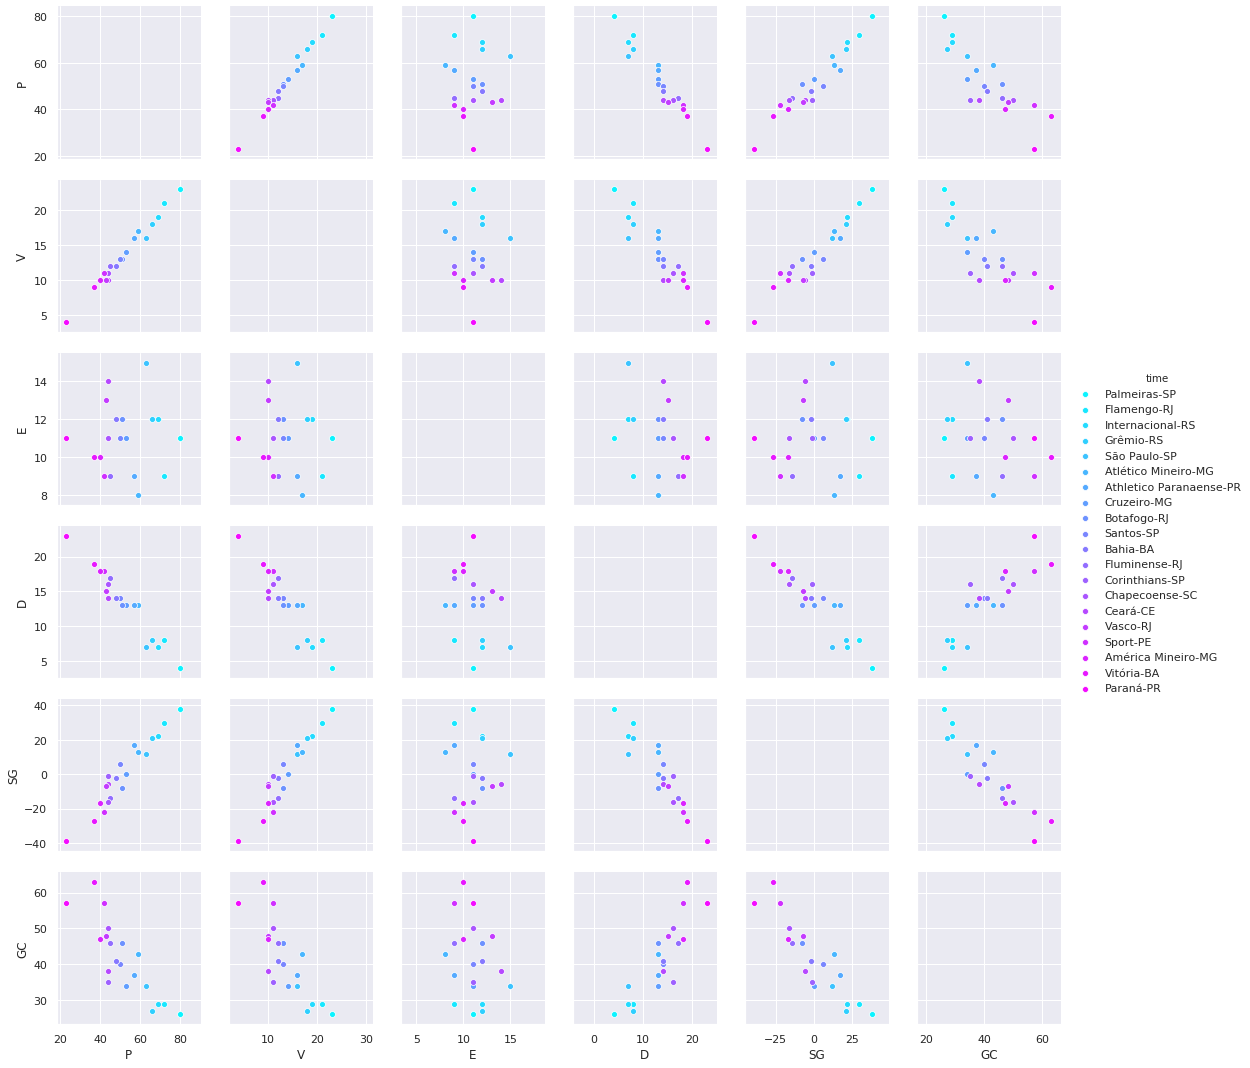

In [10]:
sns.pairplot(df2, hue = 'time', vars = ['P', 'V', 'E', 'D', 'SG', 'GC'], palette = 'cool')

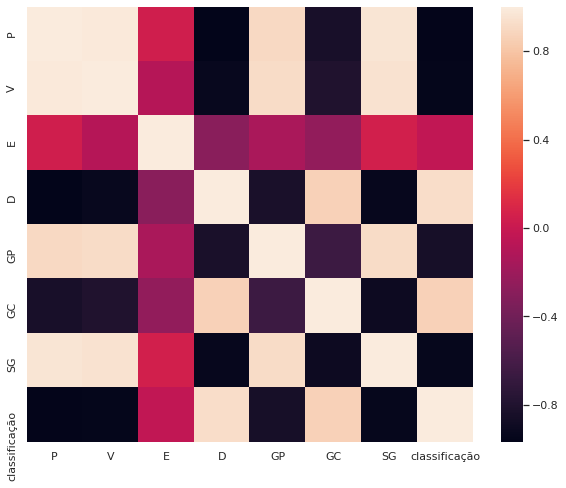

In [11]:
corrmat = df2.drop(['time', 'J'], axis = 1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmat)

##### 1.3 Preparação da base

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [13]:
encoder = {}
encoder['time'] = LabelEncoder()

In [14]:
# atributos
X = df[['casa', 'visitante']]
X.columns = ['time1', 'time2']
X['casa'] = df['casa']
X.head()

X['time1'] = encoder['time'].fit_transform(X['time1'])
X['time2'] = encoder['time'].transform(X['time2'])
X['casa'] = encoder['time'].transform(X['casa'])
X.head()
X = X.values

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [15]:
# target

def vencedor(casa, visitante, g_c, g_v):
    if g_c > g_v:
        return 'casa'
    if g_c < g_v:
        return 'visitante'
    return 'empate'

y = []
for jogo in range(len(df)):
    y.append(vencedor(df['casa'][jogo], df['visitante'][jogo], df['gols_c'][jogo], df['gols_v'][jogo]))
y = np.array(y).reshape(-1,1)

##### 1.4 Teste x Treinamento

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [19]:
def doClassifier(name, estimator, clf_dict, X_train, X_test, y_train, y_test, verbose = True):
    clf_dict[name] = estimator
    clf_dict[name].fit(X_train, y_train)
    
    if verbose:
        print('## RESULTADOS:')
        print('predições:\t', clf_dict[name].predict(X_test)[0:5], '...')
        print('real:\t\t', y_test.reshape(-1)[0:5], '...')
        print('\n## PONTUAÇÕES:')
        print('acurácia:\t{0:1.3f}'.format(clf_dict[name].score(X_test, y_test)))
        print('recall:\t\t{0:1.3f}'.format(recall_score(y_test, clf_dict[name].predict(X_test), average='weighted')))
        print('percisão:\t{0:1.3f}'.format(precision_score(y_test, clf_dict[name].predict(X_test), average='weighted')))
        print('f1:\t\t{0:1.3f}'.format(f1_score(y_test, clf_dict[name].predict(X_test), average='weighted')))
        print('\n## MATRIZ DE CONFUSÃO:')
        confusion = confusion_matrix(y_test, clf_dict[name].predict(X_test))
        print(confusion)
    
    return clf_dict

##### 1.5 Classificador Dummy

In [20]:
from sklearn.dummy import DummyClassifier
clf = {}

###### 1.5.1 stratified

In [21]:
clf = doClassifier('dummy_s', DummyClassifier(strategy='stratified'), clf, X_train, X_test, y_train, y_test)

## RESULTADOS:
predições:	 ['casa' 'casa' 'casa' 'casa' 'casa'] ...
real:		 ['casa' 'casa' 'empate' 'empate' 'visitante'] ...

## PONTUAÇÕES:
acurácia:	0.388
recall:		0.342
percisão:	0.431
f1:		0.421

## MATRIZ DE CONFUSÃO:
[[43 22 13]
 [29  7 12]
 [15  7  4]]


###### 1.5.2 most_frequent

In [22]:
clf = doClassifier('dummy_m', DummyClassifier(strategy='most_frequent'), clf, X_train, X_test, y_train, y_test)

## RESULTADOS:
predições:	 ['casa' 'casa' 'casa' 'casa' 'casa'] ...
real:		 ['casa' 'casa' 'empate' 'empate' 'visitante'] ...

## PONTUAÇÕES:
acurácia:	0.513
recall:		0.513
percisão:	0.263
f1:		0.348

## MATRIZ DE CONFUSÃO:
[[78  0  0]
 [48  0  0]
 [26  0  0]]


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### 1.6 Classificador k-NN (com grid search)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
gridParams = {'n_neighbors': [1, 2, 3, 5, 7, 11, 13, 17, 19, 23],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), gridParams, verbose = 1, cv = 5, n_jobs=-1)
gs_results = gs.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [25]:
clf = doClassifier('knn', gs_results.best_estimator_, clf, X_train, X_test, y_train, y_test)

## RESULTADOS:
predições:	 ['casa' 'casa' 'casa' 'casa' 'casa'] ...
real:		 ['casa' 'casa' 'empate' 'empate' 'visitante'] ...

## PONTUAÇÕES:
acurácia:	0.461
recall:		0.461
percisão:	0.376
f1:		0.385

## MATRIZ DE CONFUSÃO:
[[63 14  1]
 [39  6  3]
 [21  4  1]]


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


##### 1.7 SVM

In [26]:
from sklearn.svm import SVC

clf = doClassifier('svm', SVC(kernel='rbf', C=1), clf, X_train, X_test, y_train, y_test)

## RESULTADOS:
predições:	 ['casa' 'casa' 'casa' 'casa' 'casa'] ...
real:		 ['casa' 'casa' 'empate' 'empate' 'visitante'] ...

## PONTUAÇÕES:
acurácia:	0.513
recall:		0.513
percisão:	0.263
f1:		0.348

## MATRIZ DE CONFUSÃO:
[[78  0  0]
 [48  0  0]
 [26  0  0]]


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 

In [27]:
from sklearn.linear_model import LogisticRegression

clf = doClassifier('log', LogisticRegression(), clf, X_train, X_test, y_train, y_test)

## RESULTADOS:
predições:	 ['casa' 'casa' 'casa' 'casa' 'casa'] ...
real:		 ['casa' 'casa' 'empate' 'empate' 'visitante'] ...

## PONTUAÇÕES:
acurácia:	0.513
recall:		0.513
percisão:	0.263
f1:		0.348

## MATRIZ DE CONFUSÃO:
[[78  0  0]
 [48  0  0]
 [26  0  0]]


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/l

##### 1.8 Resultados compilados

In [28]:
print('\t\t\tAcurácia\tPrecisão\tRecall\tF1-Score\n')
print('Dummy stratified:\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf['dummy_s'].score(X_test, y_test),
                                                               precision_score(y_test, clf['dummy_s'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf['dummy_s'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf['dummy_s'].predict(X_test), average='weighted')))
print('Dummy most freq.:\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf['dummy_m'].score(X_test, y_test),
                                                               precision_score(y_test, clf['dummy_m'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf['dummy_m'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf['dummy_m'].predict(X_test), average='weighted')))
print('SVM:\t\t\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf['svm'].score(X_test, y_test),
                                                               precision_score(y_test, clf['svm'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf['svm'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf['svm'].predict(X_test), average='weighted')))
print('KNN:\t\t\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf['knn'].score(X_test, y_test),
                                                               precision_score(y_test, clf['knn'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf['knn'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf['knn'].predict(X_test), average='weighted')))
print('Logistic regression:\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf['log'].score(X_test, y_test),
                                                               precision_score(y_test, clf['log'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf['log'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf['log'].predict(X_test), average='weighted')))

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


			Acurácia	Precisão	Recall	F1-Score

Dummy stratified:	0.48		0.42		0.30	0.38
Dummy most freq.:	0.51		0.26		0.51	0.35
SVM:			0.51		0.26		0.51	0.35
KNN:			0.46		0.38		0.46	0.39
Logistic regression:	0.51		0.26		0.51	0.35


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 2. Time visitante, vence

##### 2.1 Seleção dos dados

In [29]:
# atributos
X = df[['casa', 'visitante']]
X.columns = ['time1', 'time2']
X['casa'] = df['casa']
X.head()

X['time1'] = encoder['time'].fit_transform(X['time1'])
X['time2'] = encoder['time'].transform(X['time2'])
X['casa'] = encoder['time'].transform(X['casa'])
X.head()
X = X.values

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [30]:
y = []
for jogo in range(len(df)):
    if vencedor(df['casa'][jogo], df['visitante'][jogo], df['gols_c'][jogo], df['gols_v'][jogo]) == 'visitante':
        y.append(1)
    else:
        y.append(0)
y = np.array(y).reshape(-1,1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

##### 2.2 Classificadores

In [32]:
clf2 = {}

In [33]:
# dummy stratified
clf2 = doClassifier('dummy_s', DummyClassifier(strategy='stratified'), clf2, X_train, X_test, y_train, y_test)

## RESULTADOS:
predições:	 [0 1 1 0 0] ...
real:		 [0 0 0 1 0] ...

## PONTUAÇÕES:
acurácia:	0.651
recall:		0.737
percisão:	0.697
f1:		0.694

## MATRIZ DE CONFUSÃO:
[[107  16]
 [ 23   6]]


In [34]:
# dummy most frequent
clf2 = doClassifier('dummy_m', DummyClassifier(strategy='most_frequent'), clf2, X_train, X_test, y_train, y_test)

## RESULTADOS:
predições:	 [0 0 0 0 0] ...
real:		 [0 0 0 1 0] ...

## PONTUAÇÕES:
acurácia:	0.809
recall:		0.809
percisão:	0.655
f1:		0.724

## MATRIZ DE CONFUSÃO:
[[123   0]
 [ 29   0]]


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
# knn

gridParams = {'n_neighbors': [1, 2, 3, 5, 7, 11, 13, 17, 19, 23],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), gridParams, verbose = 1, cv = 5, n_jobs=-1)
gs_results = gs.fit(X, y)
clf2 = doClassifier('knn', gs_results.best_estimator_, clf2, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


## RESULTADOS:
predições:	 [0 0 0 0 0] ...
real:		 [0 0 0 1 0] ...

## PONTUAÇÕES:
acurácia:	0.809
recall:		0.809
percisão:	0.655
f1:		0.724

## MATRIZ DE CONFUSÃO:
[[123   0]
 [ 29   0]]


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/h

In [36]:
# svm
clf2 = doClassifier('svm', SVC(kernel='rbf', C=1), clf2, X_train, X_test, y_train, y_test)

## RESULTADOS:
predições:	 [0 0 0 0 0] ...
real:		 [0 0 0 1 0] ...

## PONTUAÇÕES:
acurácia:	0.809
recall:		0.809
percisão:	0.655
f1:		0.724

## MATRIZ DE CONFUSÃO:
[[123   0]
 [ 29   0]]


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 

In [37]:
# logistic
clf2 = doClassifier('log', LogisticRegression(), clf2, X_train, X_test, y_train, y_test)

## RESULTADOS:
predições:	 [0 0 0 0 0] ...
real:		 [0 0 0 1 0] ...

## PONTUAÇÕES:
acurácia:	0.809
recall:		0.809
percisão:	0.655
f1:		0.724

## MATRIZ DE CONFUSÃO:
[[123   0]
 [ 29   0]]


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 2.3 Resultados

In [38]:
print('\t\t\tAcurácia\tPrecisão\tRecall\tF1-Score\n')
print('Dummy stratified:\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf2['dummy_s'].score(X_test, y_test),
                                                               precision_score(y_test, clf2['dummy_s'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf2['dummy_s'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf2['dummy_s'].predict(X_test), average='weighted')))
print('Dummy most freq.:\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf2['dummy_m'].score(X_test, y_test),
                                                               precision_score(y_test, clf2['dummy_m'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf2['dummy_m'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf2['dummy_m'].predict(X_test), average='weighted')))
print('SVM:\t\t\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf2['svm'].score(X_test, y_test),
                                                               precision_score(y_test, clf2['svm'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf2['svm'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf2['svm'].predict(X_test), average='weighted')))
print('KNN:\t\t\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf2['knn'].score(X_test, y_test),
                                                               precision_score(y_test, clf2['knn'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf2['knn'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf2['knn'].predict(X_test), average='weighted')))
print('Logistic regression:\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf2['log'].score(X_test, y_test),
                                                               precision_score(y_test, clf2['log'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf2['log'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf2['log'].predict(X_test), average='weighted')))

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasn

			Acurácia	Precisão	Recall	F1-Score

Dummy stratified:	0.70		0.72		0.71	0.71
Dummy most freq.:	0.81		0.65		0.81	0.72
SVM:			0.81		0.65		0.81	0.72
KNN:			0.81		0.65		0.81	0.72
Logistic regression:	0.81		0.65		0.81	0.72


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 3. Tendência de dados

##### 3.1 Adição das rodadas à tabela de jogos

In [39]:
rodada = []
for i in range(1, 39):
    rodada.append(i*np.ones(10, dtype = int))
rodada = np.asarray(rodada).reshape(-1)

In [40]:
df['rodada'] = rodada

In [41]:
df.columns

Index(['casa', 'gols_c', 'gols_v', 'visitante', 'pp', 'iv', 'iv%', 'renda_L',
       'renda_B', 'rodada'],
      dtype='object')

##### 3.2 Seleção dos dados

In [42]:
# atributos
X = df[['casa', 'visitante', 'rodada']]
X.columns = ['time1', 'time2', 'rodada']
X['casa'] = df['casa']
X.head()

X['time1'] = encoder['time'].fit_transform(X['time1'])
X['time2'] = encoder['time'].transform(X['time2'])
X['casa'] = encoder['time'].transform(X['casa'])
X.head()
X = X.values

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [43]:
y = []
for jogo in range(len(df)):
    if vencedor(df['casa'][jogo], df['visitante'][jogo], df['gols_c'][jogo], df['gols_v'][jogo]) == 'visitante':
        y.append(1)
    else:
        y.append(0)
y = np.array(y).reshape(-1,1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

##### 3.3 Classificadores

In [45]:
clf3 = {}

In [46]:
# dummy stratified
clf3 = doClassifier('dummy_s', DummyClassifier(strategy='stratified'), clf3, X_train, X_test, y_train, y_test, verbose = False)

# dummy most frequent
clf3 = doClassifier('dummy_m', DummyClassifier(strategy='most_frequent'), clf3, X_train, X_test, y_train, y_test, verbose = False)

# svm
clf3 = doClassifier('svm', SVC(kernel='rbf', C=1), clf3, X_train, X_test, y_train, y_test, verbose = False)

#logistic regression
clf3 = doClassifier('log', LogisticRegression(), clf3, X_train, X_test, y_train, y_test, verbose = False)

# knn
gridParams = {'n_neighbors': [1, 2, 3, 5, 7, 11, 13, 17, 19, 23],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), gridParams, verbose = 1, cv = 5, n_jobs=-1)
gs_results = gs.fit(X, y)
clf3 = doClassifier('knn', gs_results.best_estimator_, clf3, X_train, X_test, y_train, y_test, verbose = False)

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


##### 3.4 Resultados

In [47]:
print('\t\t\tAcurácia\tPrecisão\tRecall\tF1-Score\n')
print('Dummy stratified:\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf3['dummy_s'].score(X_test, y_test),
                                                               precision_score(y_test, clf3['dummy_s'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf3['dummy_s'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf3['dummy_s'].predict(X_test), average='weighted')))
print('Dummy most freq.:\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf3['dummy_m'].score(X_test, y_test),
                                                               precision_score(y_test, clf3['dummy_m'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf3['dummy_m'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf3['dummy_m'].predict(X_test), average='weighted')))
print('SVM:\t\t\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf3['svm'].score(X_test, y_test),
                                                               precision_score(y_test, clf3['svm'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf3['svm'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf3['svm'].predict(X_test), average='weighted')))
print('KNN:\t\t\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf3['knn'].score(X_test, y_test),
                                                               precision_score(y_test, clf3['knn'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf3['knn'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf3['knn'].predict(X_test), average='weighted')))
print('Logistic regression:\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf3['log'].score(X_test, y_test),
                                                               precision_score(y_test, clf3['log'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf3['log'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf3['log'].predict(X_test), average='weighted')))

			Acurácia	Precisão	Recall	F1-Score

Dummy stratified:	0.68		0.75		0.68	0.74
Dummy most freq.:	0.84		0.70		0.84	0.76
SVM:			0.84		0.70		0.84	0.76
KNN:			0.84		0.70		0.84	0.76
Logistic regression:	0.84		0.70		0.84	0.76


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasn

#### 4. Adição do *pp* (público presente) aumenta acurácia do vencedor

##### 4.1 Contrução dos dados para treino

In [48]:
# atributos
X = df[['casa', 'visitante', 'rodada', 'pp']]
X.columns = ['time1', 'time2', 'rodada', 'pp']
X['casa'] = df['casa']
X.head()

X['time1'] = encoder['time'].fit_transform(X['time1'])
X['time2'] = encoder['time'].transform(X['time2'])
X['casa'] = encoder['time'].transform(X['casa'])
X.head()
X = X.values

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [49]:
y = []
for jogo in range(len(df)):
    if vencedor(df['casa'][jogo], df['visitante'][jogo], df['gols_c'][jogo], df['gols_v'][jogo]) == 'visitante':
        y.append(1)
    else:
        y.append(0)
y = np.array(y).reshape(-1,1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

##### 4.2 Classificadores

In [51]:
clf4 = {}

In [52]:
# dummy stratified
clf4 = doClassifier('dummy_s', DummyClassifier(strategy='stratified'), clf4, X_train, X_test, y_train, y_test, verbose = False)

# dummy most frequent
clf4 = doClassifier('dummy_m', DummyClassifier(strategy='most_frequent'), clf4, X_train, X_test, y_train, y_test, verbose = False)

# svm
clf4 = doClassifier('svm', SVC(kernel='rbf', C=1), clf4, X_train, X_test, y_train, y_test, verbose = False)

#logistic regression
clf4 = doClassifier('log', LogisticRegression(), clf4, X_train, X_test, y_train, y_test, verbose = False)

# knn
gridParams = {'n_neighbors': [1, 2, 3, 5, 7, 11, 13, 17, 19, 23],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), gridParams, verbose = 1, cv = 5, n_jobs=-1)
gs_results = gs.fit(X, y)
clf4 = doClassifier('knn', gs_results.best_estimator_, clf4, X_train, X_test, y_train, y_test, verbose = False)

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


##### 4.3 Resultados

In [53]:
print('\t\t\tAcurácia\tPrecisão\tRecall\tF1-Score\n')
print('Dummy stratified:\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf4['dummy_s'].score(X_test, y_test),
                                                               precision_score(y_test, clf4['dummy_s'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf4['dummy_s'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf4['dummy_s'].predict(X_test), average='weighted')))
print('Dummy most freq.:\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf4['dummy_m'].score(X_test, y_test),
                                                               precision_score(y_test, clf4['dummy_m'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf4['dummy_m'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf4['dummy_m'].predict(X_test), average='weighted')))
print('SVM:\t\t\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf4['svm'].score(X_test, y_test),
                                                               precision_score(y_test, clf4['svm'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf4['svm'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf4['svm'].predict(X_test), average='weighted')))
print('KNN:\t\t\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf4['knn'].score(X_test, y_test),
                                                               precision_score(y_test, clf4['knn'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf4['knn'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf4['knn'].predict(X_test), average='weighted')))
print('Logistic regression:\t{0:1.2f}\t\t{1:2.2f}\t\t{2:3.2f}\t{3:4.2f}'.format(clf4['log'].score(X_test, y_test),
                                                               precision_score(y_test, clf4['log'].predict(X_test), average='weighted'),
                                                               recall_score(y_test, clf4['log'].predict(X_test), average='weighted'),
                                                               f1_score(y_test, clf4['log'].predict(X_test), average='weighted')))

			Acurácia	Precisão	Recall	F1-Score

Dummy stratified:	0.64		0.64		0.71	0.73
Dummy most freq.:	0.80		0.64		0.80	0.71
SVM:			0.80		0.64		0.80	0.71
KNN:			0.80		0.64		0.80	0.71
Logistic regression:	0.80		0.64		0.80	0.71


/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lucasn

#### 5. Estimar a classificação final

##### 5.1 Definição da base de treino

In [54]:
# atributos
X = df[['casa', 'visitante', 'rodada', 'pp']]
X.columns = ['time1', 'time2', 'rodada', 'pp']
X['casa'] = df['casa']
X.head()

X['time1'] = encoder['time'].fit_transform(X['time1'])
X['time2'] = encoder['time'].transform(X['time2'])
X['casa'] = encoder['time'].transform(X['casa'])
X.head()
X = X.values

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [55]:
y = []
for jogo in range(len(df)):
    if vencedor(df['casa'][jogo], df['visitante'][jogo], df['gols_c'][jogo], df['gols_v'][jogo]) == 'visitante':
        y.append(1)
    else:
        y.append(0)
y = np.array(y).reshape(-1,1)

In [56]:
X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]

##### 5.2 Treinamento

In [57]:
clf_svm = SVC(kernel='rbf', C=1)
clf_svm.fit(X_train, y_train)

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lucasnseq/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

##### 5.3 Classificação dos 300 primeiros jogos

In [58]:
placarPred = pd.DataFrame({'time': df2['time'].values})
placarPred['P'] = np.zeros(len(placarPred), dtype = int)
placarPred['classificação'] = np.zeros(len(placarPred), dtype = int)

In [59]:
placarPred.sample(3)

,time,P,classificação
4,São Paulo-SP,0,0
0,Palmeiras-SP,0,0
17,América Mineiro-MG,0,0


In [60]:
def atualizaPlacar(placar, nome, pts):
    pos = np.argmax(placar['time'] == nome)
    placar.at[pos, 'P'] += pts
    return placar

In [61]:
# placar:
for i in range(300):
    row = df.loc[i]
    vence = vencedor(row[0], row[3], row[1], row[2])
    if vence == 'empate':
        placarPred = atualizaPlacar(placarPred, row[0], 1)
        placarpred = atualizaPlacar(placarPred, row[3], 1)
    elif vence == 'casa':
        placarPred = atualizaPlacar(placarPred, row[0], 3)
    else:
        placarPred = atualizaPlacar(placarPred, row[3], 3)

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [62]:
placarPred

,time,P,classificação
0,Palmeiras-SP,62,0
1,Flamengo-RJ,58,0
2,Internacional-RS,57,0
3,Grêmio-RS,52,0
4,São Paulo-SP,53,0
5,Atlético Mineiro-MG,46,0
6,Athletico Paranaense-PR,40,0
7,Cruzeiro-MG,40,0
8,Botafogo-RJ,35,0
9,Santos-SP,43,0


##### 5.4 Predição dos novos jogos

In [63]:
pred = clf_svm.predict(X_test)

In [64]:
j = 300
for i in range(len(pred)):
    row = df.loc[j]
    if pred[i] == 0:
        placarPred = atualizaPlacar(placarPred, row[3], 3)
    else:
        placarPred = atualizaPlacar(placarPred, row[0], 3)
    j += 1

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [65]:
placarPred

,time,P,classificação
0,Palmeiras-SP,74,0
1,Flamengo-RJ,70,0
2,Internacional-RS,69,0
3,Grêmio-RS,64,0
4,São Paulo-SP,65,0
5,Atlético Mineiro-MG,58,0
6,Athletico Paranaense-PR,52,0
7,Cruzeiro-MG,52,0
8,Botafogo-RJ,47,0
9,Santos-SP,55,0


##### 5.5 Classificando o placar final

In [66]:
# seleciono as pontuações e ordeno decrescente
pts = []
for i in range(placarPred.shape[0]):
    row = placarPred.loc[i]
    pts.append(row[1])
pts.sort(reverse = True)

# excluo as pontuações repetidas
j = 1
for i in range(1, len(pts)):
    if pts[j] == pts[j-1]:
        pts.pop(j)
    else:
        j += 1
    if j == len(pts):
        break
pts = np.array(pts)

# atribuo a classificação
for i in range(placarPred.shape[0]):
    row = placarPred.loc[i]
    pos = np.argmax(pts == row[1]) + 1
    placarPred.at[i, 'classificação'] = pos
placarPred

,time,P,classificação
0,Palmeiras-SP,74,1
1,Flamengo-RJ,70,2
2,Internacional-RS,69,3
3,Grêmio-RS,64,5
4,São Paulo-SP,65,4
5,Atlético Mineiro-MG,58,6
6,Athletico Paranaense-PR,52,8
7,Cruzeiro-MG,52,8
8,Botafogo-RJ,47,11
9,Santos-SP,55,7


##### 5.6 Cálculo dos erros obtidos

In [67]:
erro = 0.0
erroabs = 0.0
for i in range(placarPred.shape[0]):
    rowPred = placarPred.loc[i]
    rowReal = df2.loc[i]
    erro += (rowPred[2] - rowReal[9])**2
    erroabs += abs(rowPred[2] - rowReal[9])
print('TIPO\t\t\t\tERRO')
print('Erro quadrático\t\t\t{}'.format(erro))
print('Erro quadrático médio\t\t{}'.format(erro/placarPred.shape[0]))
print('Erro absoluto\t\t\t{}'.format(erroabs))
print('Erro absoluto médio\t\t{}'.format(erroabs/placarPred.shape[0]))

TIPO				ERRO
Erro quadrático			162.0
Erro quadrático médio		8.1
Erro absoluto			42.0
Erro absoluto médio		2.1


### Questão 2

Um empresário está em busca de um time do campeonato brasileiro para fechar uma parceria.

A parceria consiste no fornecimento de transporte e hospedagem para todos os jogos onde o time é visitante, e em contra partida o time se propõe a utilizar a logo da empresa nesses jogos e dividir a renda líquida dos jogos em 80% para o clube e 20% para a empresa.

time visitante:
    - renda_L: 80% empresa

Baseado nos dados do primeiro turno do campeonato de 2018 (isto é, os 190 primeiros jogos), faça uma lista de recomendação com as três melhores opções de time para patrocinar.

Suponha que a empresa consiga faturar em média 2 reais por torcedor presente.
    - empresa - lucro por torcedor: 2.00

Escolhendo a melhor opção de time para investir, faça uma análise se a opção escolhida continuou a ser boa nos 190 jogos restantes.


In [171]:
df.sample(2)

,casa,gols_c,gols_v,visitante,pp,iv,iv%,renda_L,renda_B,rodada
185,Cruzeiro-MG,1,1,Bahia-BA,24.127,24209.0,100,280241.29,387435.0,19
156,Cruzeiro-MG,0,2,São Paulo-SP,21.304,21433.0,99,459586.57,641978.0,16


In [172]:
df2.sample(2)

,time,P,J,V,E,D,GP,GC,SG,classificação
18,Vitória-BA,37,38,9,10,19,36,63,-27,19
4,São Paulo-SP,63,38,16,15,7,46,34,12,5


#### 6. Interpretação dos dados

##### 6.1 Ajuste dos valores

In [173]:
def realToFloat(value):
    temp = value.split(' ')[1]
    temp = temp.split(',')
    left = temp[0].split('.')
    right = temp[1]
    temp = 0.0
    for i, txt in enumerate(left[::-1]):
        num = float(txt)
        temp += num*10**(3*i)
    temp += float(right)/100
    return temp

In [174]:
df['renda_L'] = df['renda_L'].apply(realToFloat)
df['renda_B'] = df['renda_B'].apply(realToFloat)

AttributeError: 'float' object has no attribute 'split'

In [175]:
df['iv'] = df['iv'].apply(lambda x : x*1000)

In [176]:
df.sample(2)

,casa,gols_c,gols_v,visitante,pp,iv,iv%,renda_L,renda_B,rodada
72,Flamengo-RJ,2,0,Bahia-BA,50.141,50860000.0,99,492014.35,1780859.0,8
372,Sport-PE,2,1,Santos-SP,15.214,15214000.0,100,111143.93,225305.0,38


##### 6.2 Seleção dos 190 primeiros jogos

In [177]:
base = df.loc[:189]
base = base.drop(['casa', 'gols_c', 'gols_v', 'pp', 'iv%', 'renda_B'], axis = 1)

In [178]:
base.shape

(190, 4)

In [179]:
base.columns

Index(['visitante', 'iv', 'renda_L', 'rodada'], dtype='object')

##### 6.3 Séries temporais

In [180]:
base_group = base.groupby(['visitante'])

In [181]:
serie_iv = {}
serie_renda_L = {}
serie_rodada = {}

In [182]:
for time in base['visitante'].unique():
    index = base_group.groups[time]
    tabela_time = base.iloc[index]
    serie_iv[time] = tabela_time['iv'].values
    serie_renda_L[time] = tabela_time['renda_L'].values
    serie_rodada[time] = tabela_time['rodada'].values

##### 6.4 Séries temporais (vizualização)

In [183]:
from sklearn.linear_model import LinearRegression

Text(0, 0.5, 'renda_L')

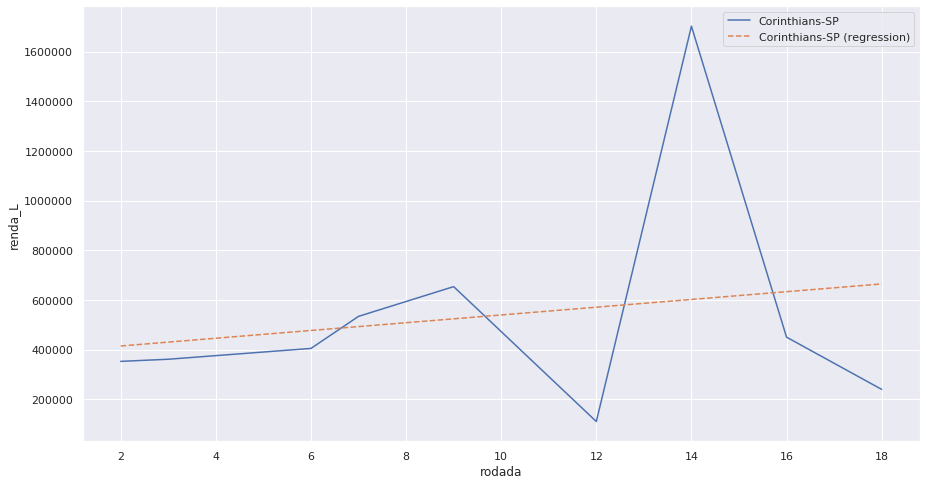

In [184]:
time = 'Corinthians-SP'
reg = LinearRegression()
reg.fit(serie_rodada[time].reshape(-1,1), serie_renda_L[time].reshape(-1,1))

x = np.linspace(serie_rodada[time].min(), serie_rodada[time].max())
y = reg.predict(x.reshape(-1,1))

plt.figure(figsize=(15,8))
plt.plot(serie_rodada[time], serie_renda_L[time],label = time)
plt.plot(x, y, '--', label = time + ' (regression)')
plt.legend()
plt.xlabel('rodada')
plt.ylabel('renda_L')

Text(0, 0.5, 'iv')

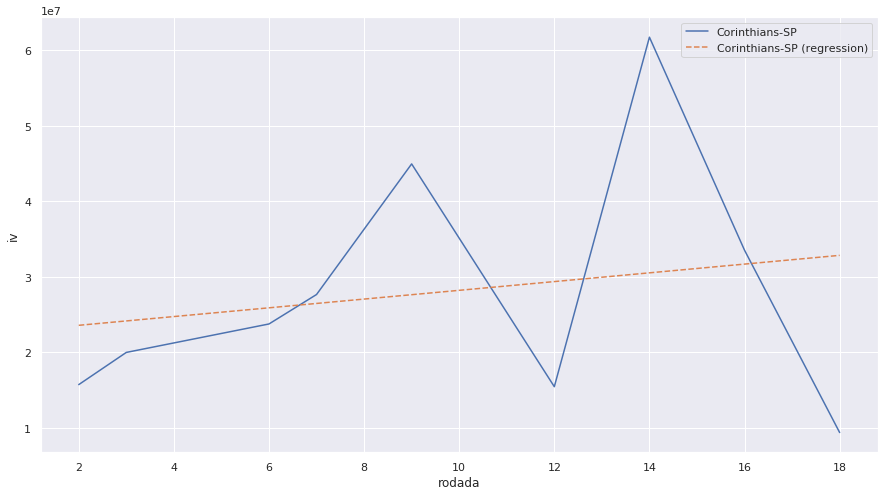

In [185]:
time = 'Corinthians-SP'
reg = LinearRegression()
reg.fit(serie_rodada[time].reshape(-1,1), serie_iv[time].reshape(-1,1))

x = np.linspace(serie_rodada[time].min(), serie_rodada[time].max())
y = reg.predict(x.reshape(-1,1))

plt.figure(figsize=(15,8))
plt.plot(serie_rodada[time], serie_iv[time],label = time)
plt.plot(x, y, '--', label = time + ' (regression)')
plt.legend()
plt.xlabel('rodada')
plt.ylabel('iv')

##### 6.5 Tendência por regressão

In [186]:
regs_iv = {}
regs_renda_L = {}
for time in base['visitante'].unique():
    regs_iv[time] = LinearRegression()
    regs_iv[time].fit(serie_rodada[time].reshape(-1,1), serie_iv[time].reshape(-1,1))
    
    regs_renda_L[time] = LinearRegression()
    regs_renda_L[time].fit(serie_rodada[time].reshape(-1,1), serie_renda_L[time].reshape(-1,1))

##### 6.6 Tabela de valores para patrocinador

In [221]:
PCTG = 0.2

tabela = pd.DataFrame({'time' : base['visitante'].unique()})
ivs_media = []
rendas_media = []
ivs_tend = []
rendas_tend = []
for time in base['visitante'].unique():
    ivs_media.append(serie_iv[time].mean()*PCTG)
    rendas_media.append(serie_renda_L[time].mean()*PCTG)
    ivs_tend.append(regs_iv[time].coef_[0][0])
    rendas_tend.append(regs_renda_L[time].coef_[0][0])
tabela['IV [por jogo]'] = ivs_media
tabela['TEND IV'] = ivs_tend
tabela['RENDA LIQ [por jogo]'] = rendas_media
tabela['TEND RENDA LIQ'] = rendas_tend

In [222]:
from sklearn.preprocessing import MinMaxScaler

def score(tabela):
    scaler = MinMaxScaler()
    aux = scaler.fit_transform(tabela[['IV [por jogo]', 'TEND IV', 'RENDA LIQ [por jogo]', 'TEND RENDA LIQ']])
    pts = []
    for i in range(len(aux)):
        pts.append(4/((1/aux[i][0]) + (1/aux[i][1]) + (1/aux[i][2]) +(1/aux[i][3])))
    pts = MinMaxScaler().fit_transform(np.array(pts).reshape(-1,1))
    tabela['score'] = pts
    return tabela

tabela = score(tabela)

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [223]:
tabela.sort_values(by = 'score', ascending=False).head(5)

,time,IV [por jogo],TEND IV,RENDA LIQ [por jogo],TEND RENDA LIQ,score
15,Vasco-RJ,4.563511e+06,1.475593e+06,75567.051111,71007.315536,1.000000
17,Corinthians-SP,5.602356e+06,5.792028e+05,106828.385333,15621.675620,0.963377
0,Paraná-PR,4.205533e+06,1.652410e+06,78225.741111,60449.732035,0.952149
8,Flamengo-RJ,5.258800e+06,-4.695919e+05,115697.089556,-1149.135895,0.719315
13,São Paulo-SP,4.517760e+06,-9.730011e+04,75025.435200,6006.785175,0.697735


In [224]:
tabela.describe()

,IV [por jogo],TEND IV,RENDA LIQ [por jogo],TEND RENDA LIQ,score
count,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000
mean,3.677531e+06,1.113108e+05,53836.223482,1577.649192,0.423102
std,8.546400e+05,8.906744e+05,26162.086964,30454.209750,0.306202
min,2.415860e+06,-1.854231e+06,20540.162600,-44418.476758,0.000000
25%,3.091122e+06,-3.808679e+05,38516.483200,-25063.114137,0.281955
50%,3.540942e+06,1.055522e+05,47570.146989,999.179885,0.348827
75%,4.207035e+06,7.410432e+05,72926.504700,10389.064087,0.510912
max,5.602356e+06,1.652410e+06,115697.089556,71007.315536,1.000000


##### 6.8 Análise aos 190 últimos jogos

In [225]:
base_last = df.loc[190:].reset_index(drop = True)
base_last = base_last.drop(['casa', 'gols_c', 'gols_v', 'pp', 'iv%', 'renda_B'], axis = 1)

In [226]:
base_group_last = base_last.groupby(['visitante'])

In [227]:
serie_iv_last = {}
serie_renda_L_last = {}
serie_rodada_last = {}

In [228]:
for time in base_last['visitante'].unique():
    index = base_group_last.groups[time]
    tabela_time = base_last.iloc[index]
    serie_iv_last[time] = tabela_time['iv'].values
    serie_renda_L_last[time] = tabela_time['renda_L'].values
    serie_rodada_last[time] = tabela_time['rodada'].values

Text(0, 0.5, 'iv')

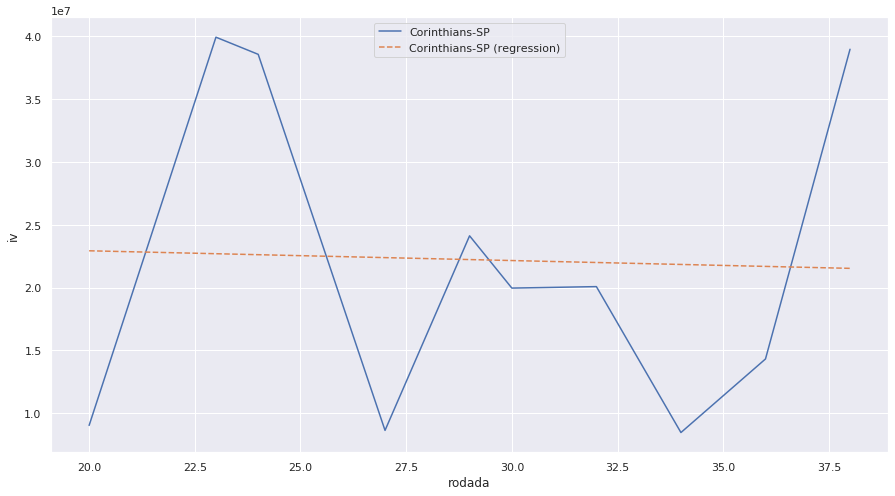

In [229]:
time = 'Corinthians-SP'
reg = LinearRegression()
reg.fit(serie_rodada_last[time].reshape(-1,1), serie_iv_last[time].reshape(-1,1))

x = np.linspace(serie_rodada_last[time].min(), serie_rodada_last[time].max())
y = reg.predict(x.reshape(-1,1))

plt.figure(figsize=(15,8))
plt.plot(serie_rodada_last[time], serie_iv_last[time],label = time)
plt.plot(x, y, '--', label = time + ' (regression)')
plt.legend()
plt.xlabel('rodada')
plt.ylabel('iv')

Text(0, 0.5, 'renda_L')

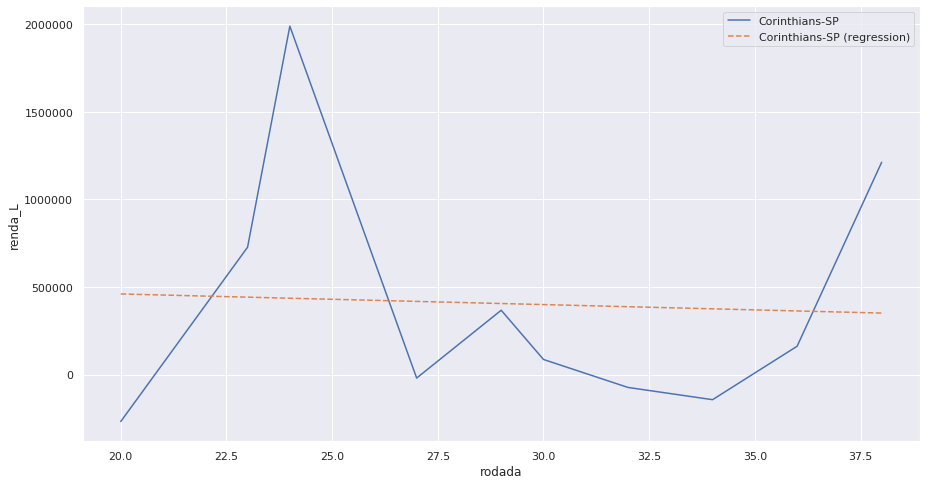

In [230]:
time = 'Corinthians-SP'
reg = LinearRegression()
reg.fit(serie_rodada_last[time].reshape(-1,1), serie_renda_L_last[time].reshape(-1,1))

x = np.linspace(serie_rodada_last[time].min(), serie_rodada_last[time].max())
y = reg.predict(x.reshape(-1,1))

plt.figure(figsize=(15,8))
plt.plot(serie_rodada_last[time], serie_renda_L_last[time],label = time)
plt.plot(x, y, '--', label = time + ' (regression)')
plt.legend()
plt.xlabel('rodada')
plt.ylabel('renda_L')

In [231]:
regs_iv_last = {}
regs_renda_L_last = {}
for time in base_last['visitante'].unique():
    regs_iv_last[time] = LinearRegression()
    regs_iv_last[time].fit(serie_rodada_last[time].reshape(-1,1), serie_iv_last[time].reshape(-1,1))
    
    regs_renda_L_last[time] = LinearRegression()
    regs_renda_L_last[time].fit(serie_rodada_last[time].reshape(-1,1), serie_renda_L_last[time].reshape(-1,1))

In [232]:
PCTG = 0.2

tabela_last = pd.DataFrame({'time' : base_last['visitante'].unique()})
ivs_media = []
rendas_media = []
ivs_tend = []
rendas_tend = []
for time in base_last['visitante'].unique():
    ivs_media.append(serie_iv_last[time].mean()*PCTG)
    rendas_media.append(serie_renda_L_last[time].mean()*PCTG)
    ivs_tend.append(regs_iv_last[time].coef_[0][0])
    rendas_tend.append(regs_renda_L_last[time].coef_[0][0])
tabela_last['IV [por jogo]'] = ivs_media
tabela_last['TEND IV'] = ivs_tend
tabela_last['RENDA LIQ [por jogo]'] = rendas_media
tabela_last['TEND RENDA LIQ'] = rendas_tend

In [233]:
tabela_last = score(tabela_last)

/home/lucasnseq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [234]:
tabela_last.describe()

,IV [por jogo],TEND IV,RENDA LIQ [por jogo],TEND RENDA LIQ,score
count,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000
mean,5.145503e+06,5.517654e+05,52599.852390,-1630.644791,0.212431
std,4.710395e+06,1.833680e+06,31549.037925,31598.226609,0.214571
min,2.812689e+06,-2.453032e+06,9898.614222,-85738.066677,0.000000
25%,3.496083e+06,-1.999161e+05,29757.040467,-20202.845033,0.103623
50%,4.117040e+06,2.405828e+05,48911.742767,-4894.589455,0.183995
75%,4.824096e+06,6.954011e+05,71015.916350,16998.782127,0.257198
max,2.485893e+07,7.255993e+06,136938.660889,64815.455300,1.000000


PREDIÇÃO FINAL

In [238]:
tabela_last.sort_values(by = 'score', ascending=False).head(5)

,time,IV [por jogo],TEND IV,RENDA LIQ [por jogo],TEND RENDA LIQ,score
2,Vitória-BA,2.485893e+07,7.255993e+06,65731.322000,64815.455300,1.000000
11,Palmeiras-SP,5.912956e+06,2.982610e+05,136938.660889,8455.904354,0.398493
6,América Mineiro-MG,4.811720e+06,1.044597e+06,69617.102800,24380.371305,0.304955
16,Fluminense-RJ,4.861222e+06,9.805000e+04,85388.762222,7315.519679,0.295231
13,Flamengo-RJ,5.310040e+06,-6.522730e+05,75212.357000,-20155.323066,0.285770


PREDIÇÃO INICIAL

In [239]:
tabela.sort_values(by = 'score', ascending=False).head(5)

,time,IV [por jogo],TEND IV,RENDA LIQ [por jogo],TEND RENDA LIQ,score
15,Vasco-RJ,4.563511e+06,1.475593e+06,75567.051111,71007.315536,1.000000
17,Corinthians-SP,5.602356e+06,5.792028e+05,106828.385333,15621.675620,0.963377
0,Paraná-PR,4.205533e+06,1.652410e+06,78225.741111,60449.732035,0.952149
8,Flamengo-RJ,5.258800e+06,-4.695919e+05,115697.089556,-1149.135895,0.719315
13,São Paulo-SP,4.517760e+06,-9.730011e+04,75025.435200,6006.785175,0.697735


#### 6.9 Conclusão

Mudaram bastante o comportamento das variáveis nos 190 últimos jogos do campeonato, de forma que os times que parecia ser bons para serem priorisados no investimento, no final não tiveram um bom progresso nos últimos jogos.